In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scripts.hpo import read_from_s3


sns.set_theme(style="white")

FILENAME = "winequality-red"
S3_BUCKET_NAME = os.getenv("S3_BUCKET_NAME")
S3_ENDPOINT = os.getenv("MLFLOW_S3_ENDPOINT_URL")

2023/08/12 19:46:48 INFO mlflow.tracking.fluent: Experiment with name 'red-wine-quality-hyperopt' does not exist. Creating a new experiment.


In [23]:
# ideas
# LinearSVC, KNN, SVC, EnsembleClassifiers

In [2]:
df = read_from_s3(bucket_name=S3_BUCKET_NAME, filename=FILENAME)

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<Axes: >

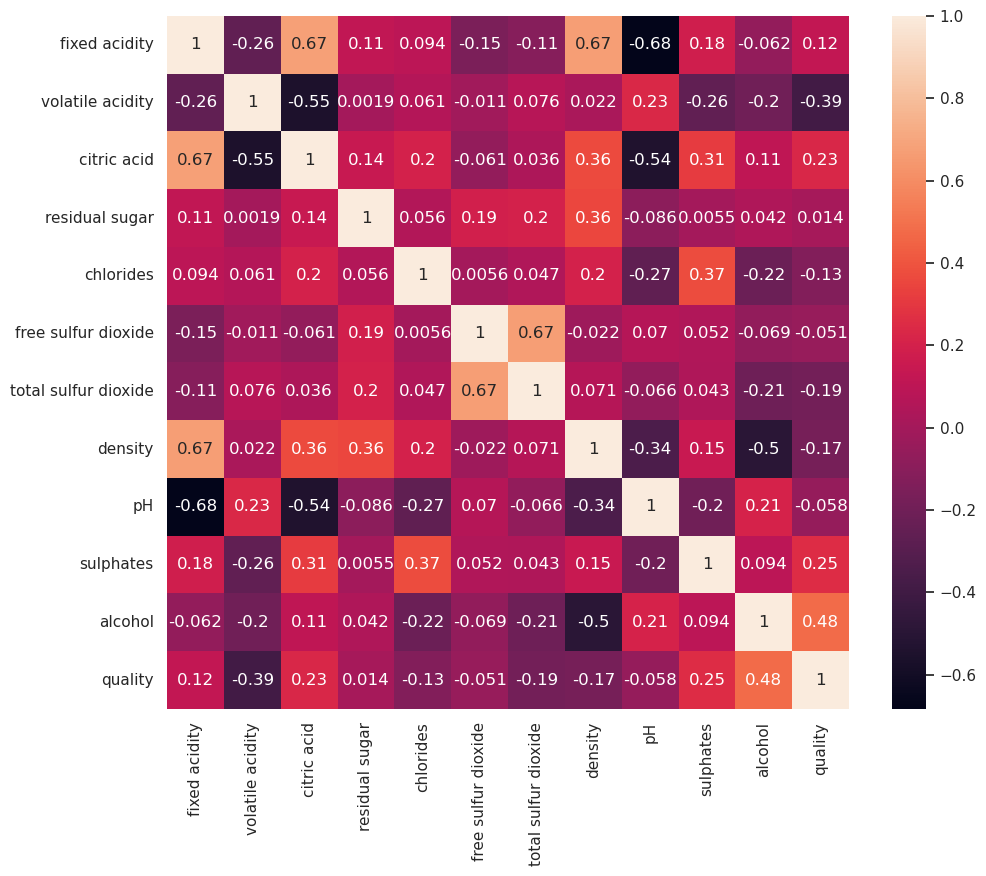

In [4]:
# plot the correlation heatmap
corr = df.corr()
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(data=corr, annot=True)

Based on the correlation matrix it's better to start with the features with high quality correlation. (> |0.2|)
The chosen features are volatile acidity, citric acid, sulphates, alcohol.

In [5]:
TARGET = "quality"
FEATURES = [
    "volatile acidity", "citric acid",
    "sulphates", "alcohol"
]

In [6]:
df[FEATURES + [TARGET]].describe()

,volatile acidity,citric acid,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.527821,0.270976,0.658149,10.422983,5.636023
std,0.179060,0.194801,0.169507,1.065668,0.807569
min,0.120000,0.000000,0.330000,8.400000,3.000000
25%,0.390000,0.090000,0.550000,9.500000,5.000000
50%,0.520000,0.260000,0.620000,10.200000,6.000000
75%,0.640000,0.420000,0.730000,11.100000,6.000000
max,1.580000,1.000000,2.000000,14.900000,8.000000


<Axes: ylabel='Density'>

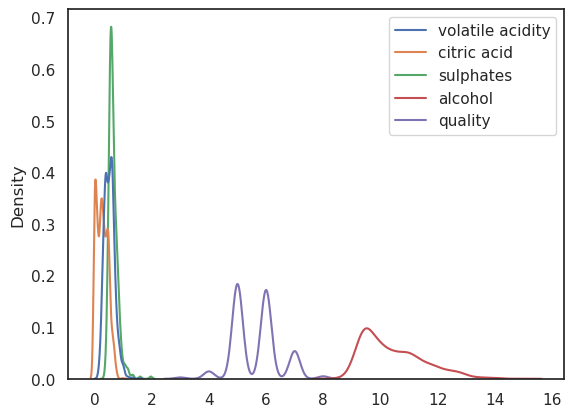

In [7]:
sns.kdeplot(data=df[FEATURES + [TARGET]])